<a href="https://colab.research.google.com/github/dhivyapm/CS7357/blob/master/NN_HW_3_CNN_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

df = pd.read_csv('https://raw.githubusercontent.com/kevinsuo/CS7357/master/project/3/data/MNIST.csv',sep=',')
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [46]:
num_folds=5
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
num_folds = 5
fold_no = 1
#save the model history in a list after fitting so that we can plot later
model_history = []
for train, test in kfold.split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #convering the train and test features dataframe to array
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    #  convert the values of the series from int type to a float type
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    #normalize the train and test feature values
    X_train = X_train/255
    X_test = X_test/255
    # Converts a class vector from train and test set to binary class matrix 
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    #define input_ shape for the CNN model
    input_shape = (28, 28, 1)
    ##model building
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=128, epochs=10)
    score = model.evaluate(X_test, y_test, verbose=1)
    scores = []
    #print the accuracy and loss in each fold
    print(f'Score for fold {fold_no}: {model.metrics_names[1]} of {np.round(np.mean(score[1])*100,3)}%')
    print('-'*120)
    # appending the accuracy from all folds
    acc_per_fold.append(score[1] * 100)
    # appending the loss from all folds
    loss_per_fold.append(score[0])
    # appending the model history for plotting the accuracy and loss
    model_history.append(history)
      # Increase fold number
    fold_no = fold_no + 1
print('-'*80)
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  
  print(f' Fold {i+1} - Accuracy: {np.round(acc_per_fold[i],2)}%')
print('-'*80)
print('Average of all 5 folds accuracy = ',np.round(np.mean(acc_per_fold),3),'%')
print(f'Maximun accuracy from all folds: {np.max(acc_per_fold)}')
print(f'Minimun loss from all folds: {np.min(loss_per_fold)}')


Epoch 1/10
8/8 [==============================] - 5s 517ms/step - loss: 1.7670 - accuracy: 0.4054
Epoch 2/10
8/8 [==============================] - 4s 513ms/step - loss: 0.7719 - accuracy: 0.7363
Epoch 3/10
8/8 [==============================] - 4s 509ms/step - loss: 0.4192 - accuracy: 0.8791
Epoch 4/10
8/8 [==============================] - 4s 513ms/step - loss: 0.2740 - accuracy: 0.9094
Epoch 5/10
8/8 [==============================] - 4s 513ms/step - loss: 0.2595 - accuracy: 0.9178
Epoch 6/10
8/8 [==============================] - 4s 513ms/step - loss: 0.2058 - accuracy: 0.9381
Epoch 7/10
8/8 [==============================] - 4s 511ms/step - loss: 0.1121 - accuracy: 0.9669
Epoch 8/10
8/8 [==============================] - 4s 515ms/step - loss: 0.0700 - accuracy: 0.9821
Epoch 9/10
8/8 [==============================] - 4s 509ms/step - loss: 0.0484 - accuracy: 0.9869
Epoch 10/10
4/4 [==============================] - 0s 35ms/step - loss: 0.6917 - accuracy: 0.8800
Score for fold 1: ac

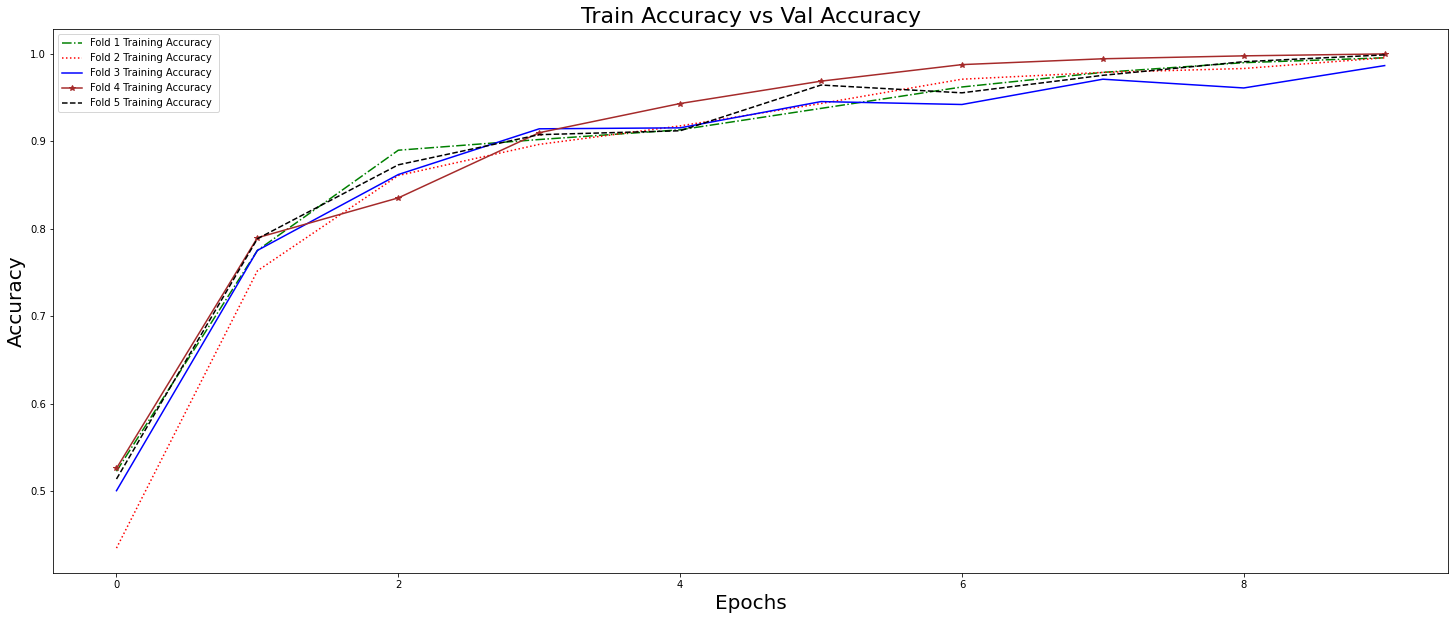

In [55]:
plt.figure(figsize=(25,10))
plt.xlabel("Epochs",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.title('Train Accuracy vs Val Accuracy',fontsize=22)
plt.plot(model_history[0].history['accuracy'], label='Fold 1 Training Accuracy ', linestyle = "dashdot", color='green')
plt.plot(model_history[1].history['accuracy'], label='Fold 2 Training Accuracy', linestyle = 'dotted', color='red', )
plt.plot(model_history[2].history['accuracy'], label='Fold 3 Training Accuracy', linestyle = 'solid', color='blue', )
plt.plot(model_history[3].history['accuracy'], label='Fold 4 Training Accuracy', marker = '*', color='brown', )
plt.plot(model_history[4].history['accuracy'], label='Fold 5 Training Accuracy', linestyle = 'dashed', color='black', )   
plt.legend()
plt.show()

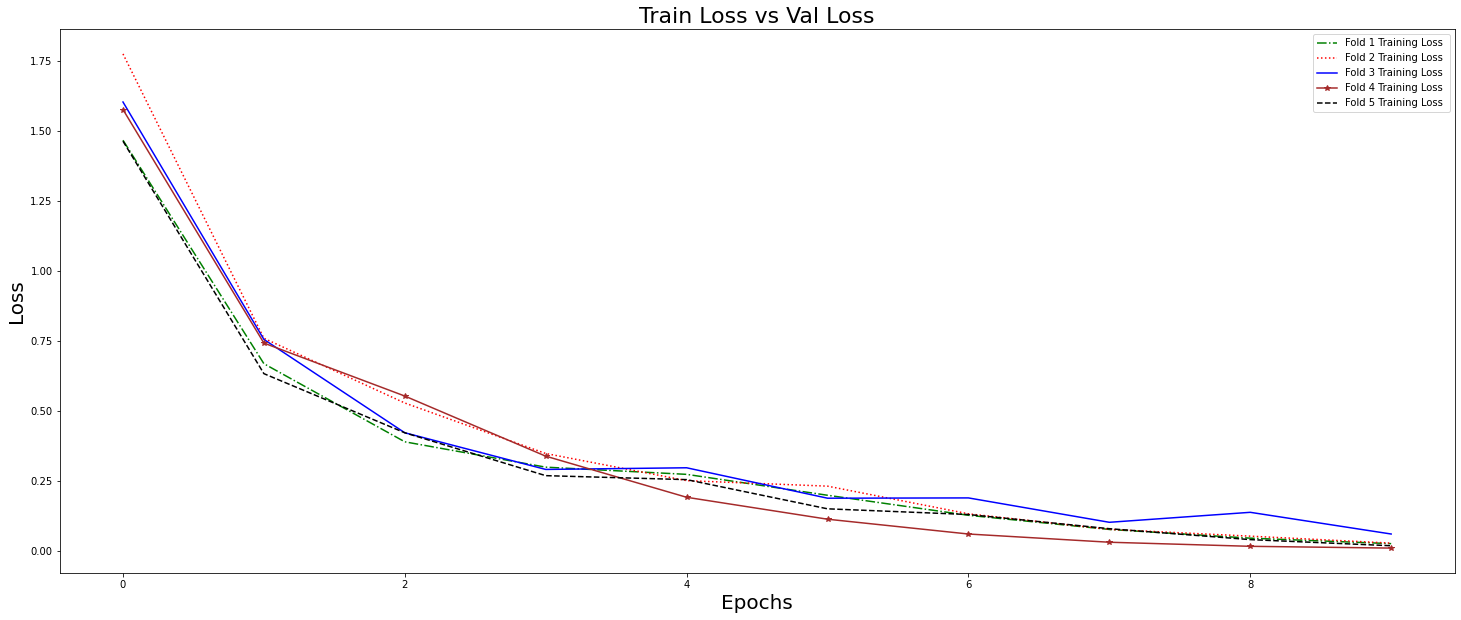

In [54]:
plt.figure(figsize=(25,10))
plt.title('Train Loss vs Val Loss',fontsize=22)
plt.xlabel("Epochs",fontsize=20)
plt.ylabel("Loss",fontsize=20)
plt.plot(model_history[0].history['loss'], label='Fold 1 Training Loss ', linestyle = "dashdot", color='green')
plt.plot(model_history[1].history['loss'], label='Fold 2 Training Loss', linestyle = 'dotted', color='red', )
plt.plot(model_history[2].history['loss'], label='Fold 3 Training Loss', linestyle = 'solid', color='blue', )
plt.plot(model_history[3].history['loss'], label='Fold 4 Training Loss', marker = '*', color='brown', )
plt.plot(model_history[4].history['loss'], label='Fold 5 Training Loss', linestyle = 'dashed', color='black', )     
plt.legend()
plt.show()